In [14]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

(48, 1)
            Count
Data             
2019-01-01      2
2019-02-01      6
2019-03-01      7
2019-04-01      5
2019-05-01      6
2019-06-01      6
2019-07-01      3
2019-08-01      1
2019-09-01      1
2019-10-01      6
2019-11-01     32
2019-12-01      3
2020-01-01      8
2020-02-01      8
2020-03-01     11
2020-04-01      0
2020-05-01      3
2020-06-01     12
2020-07-01     11
2020-08-01      3
2020-09-01      4
2020-10-01     15
2020-11-01     46
2020-12-01      5
2021-01-01      6
2021-02-01      4
2021-03-01     10
2021-04-01      6
2021-05-01      3
2021-06-01      8
2021-07-01      4
2021-08-01      6
2021-09-01      6
2021-10-01      8
2021-11-01     20
2021-12-01     13
2022-01-01      8
2022-02-01     19
2022-03-01      6
2022-04-01      5
2022-05-01      4
2022-06-01      5
2022-07-01      3
2022-08-01     10
2022-09-01      5
2022-10-01      6
2022-11-01     15
2022-12-01      6


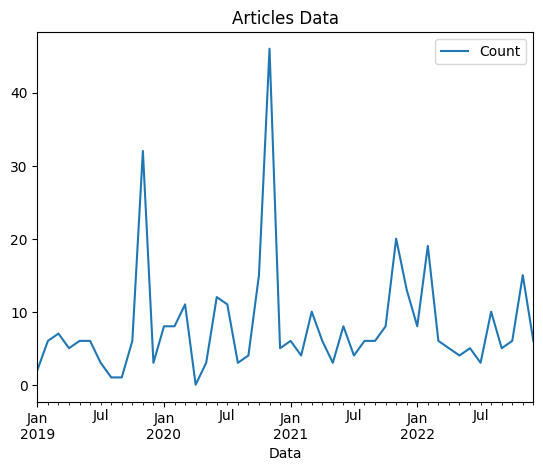

In [15]:
airline = pd.read_csv('articles.csv',sep=";",index_col='Data',parse_dates=True,dayfirst=True)

# finding shape of the dataframe
print(airline.shape)
# having a look at the data
print(airline)
# plotting the original data
airline[['Count']].plot(title='Articles Data')

airline[airline == 0] = 0.1

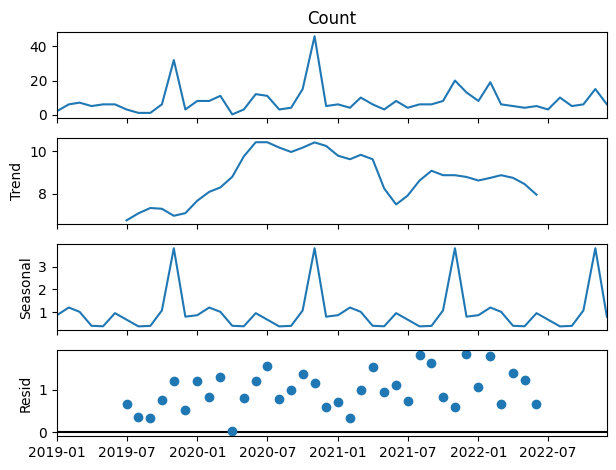

In [16]:
decompose_result = seasonal_decompose(airline["Count"],model='multiplicative')
decompose_result.plot();

In [17]:
# Set the frequency of the date time index as Monthly start as indicated by the data
airline.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

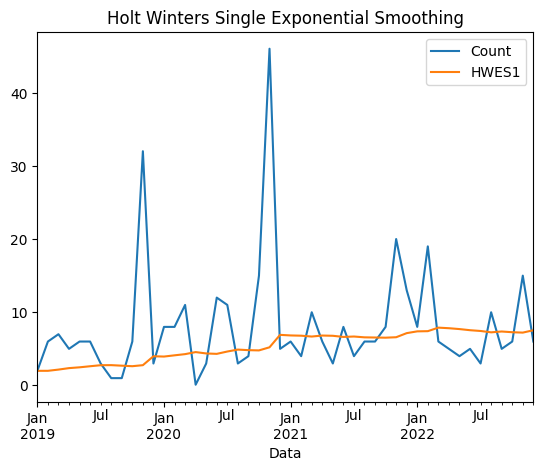

In [18]:
airline['HWES1'] = SimpleExpSmoothing(airline['Count']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
airline[['Count','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

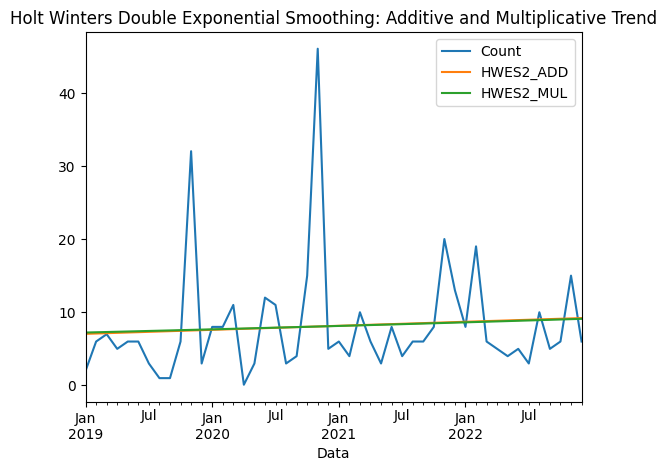

In [19]:
airline['HWES2_ADD'] = ExponentialSmoothing(airline['Count'],trend='add').fit().fittedvalues
airline['HWES2_MUL'] = ExponentialSmoothing(airline['Count'],trend='mul').fit().fittedvalues
airline[['Count','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

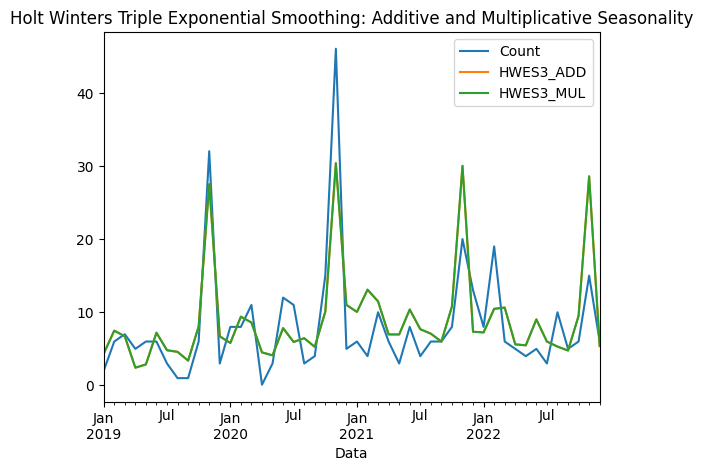

In [20]:
airline['HWES3_ADD'] = ExponentialSmoothing(airline['Count'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
airline['HWES3_MUL'] = ExponentialSmoothing(airline['Count'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
airline[['Count','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

In [21]:
forecast_data = pd.read_csv('articles.csv',sep=";",index_col='Data',parse_dates=True,dayfirst=True)

forecast_data[forecast_data == 0] = 0.1

forecast_data.index.freq = 'MS'



# Split into train and test set
train_airline = forecast_data[:48]
test_airline = forecast_data[48:]

forecast_data.head()

,Count
Data,
2019-01-01,2.0
2019-02-01,6.0
2019-03-01,7.0
2019-04-01,5.0
2019-05-01,6.0


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

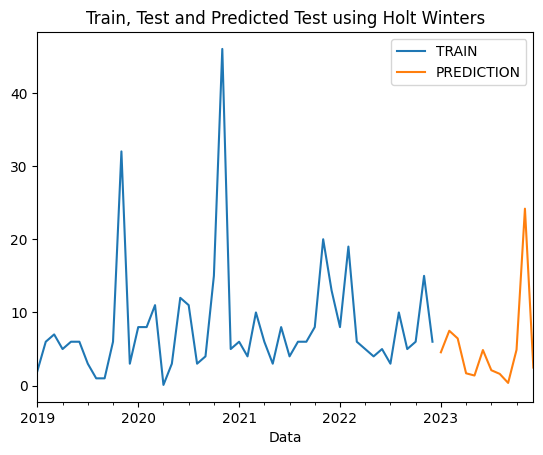

In [22]:
fitted_model = ExponentialSmoothing(train_airline['Count'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(12)
train_airline['Count'].plot(legend=True,label='TRAIN')
#test_airline['Count'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [23]:
test_predictions

2023-01-01     4.556019
2023-02-01     7.497933
2023-03-01     6.450014
2023-04-01     1.687184
2023-05-01     1.384240
2023-06-01     4.866209
2023-07-01     2.108284
2023-08-01     1.610618
2023-09-01     0.372972
2023-10-01     4.895463
2023-11-01    24.178033
2023-12-01     2.470885
Freq: MS, dtype: float64

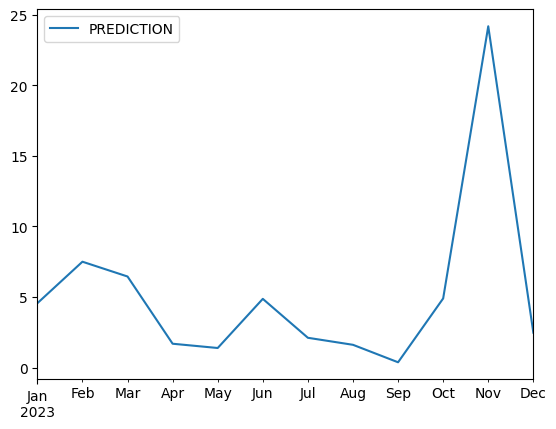

In [24]:
#test_airline['Count'].plot(legend=True,label='TEST',figsize=(9,6))
test_predictions.plot(legend=True,label='PREDICTION');